In [3]:
# Loading dataset
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
%matplotlib inline

df = pd.read_csv('/content/company.csv')
df.head()

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   company                16 non-null     object
 1   job                    16 non-null     object
 2   degree                 16 non-null     object
 3   salary_more_then_100k  16 non-null     int64 
dtypes: int64(1), object(3)
memory usage: 644.0+ bytes


In [5]:
# Checking missing values
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 company                  0
job                      0
degree                   0
salary_more_then_100k    0
dtype: int64


In [6]:
df.company.unique(), df.job.unique(), df.degree.unique()

(array(['google', 'abc pharma', 'facebook'], dtype=object),
 array(['sales executive', 'business manager', 'computer programmer'],
       dtype=object),
 array(['bachelors', 'masters'], dtype=object))

In [ ]:
df.company.replace({'google':0, 'abc pharma':1, 'facebook':2}, inplace=True)
df.job.replace({'sales executive':0, 'business manager':1, 'computer programmer':2}, inplace=True)
df.degree.replace({'bachelors':0, 'masters':1}, inplace=True)

In [8]:
X = df.drop('salary_more_then_100k', axis=1)
y = df.salary_more_then_100k

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=70)

In [10]:
model = DecisionTreeClassifier(criterion='entropy')
model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [11]:
y_pred = model.predict(X_test)
print("Accuracy: ",accuracy_score(y_test,y_pred))

Accuracy:  1.0


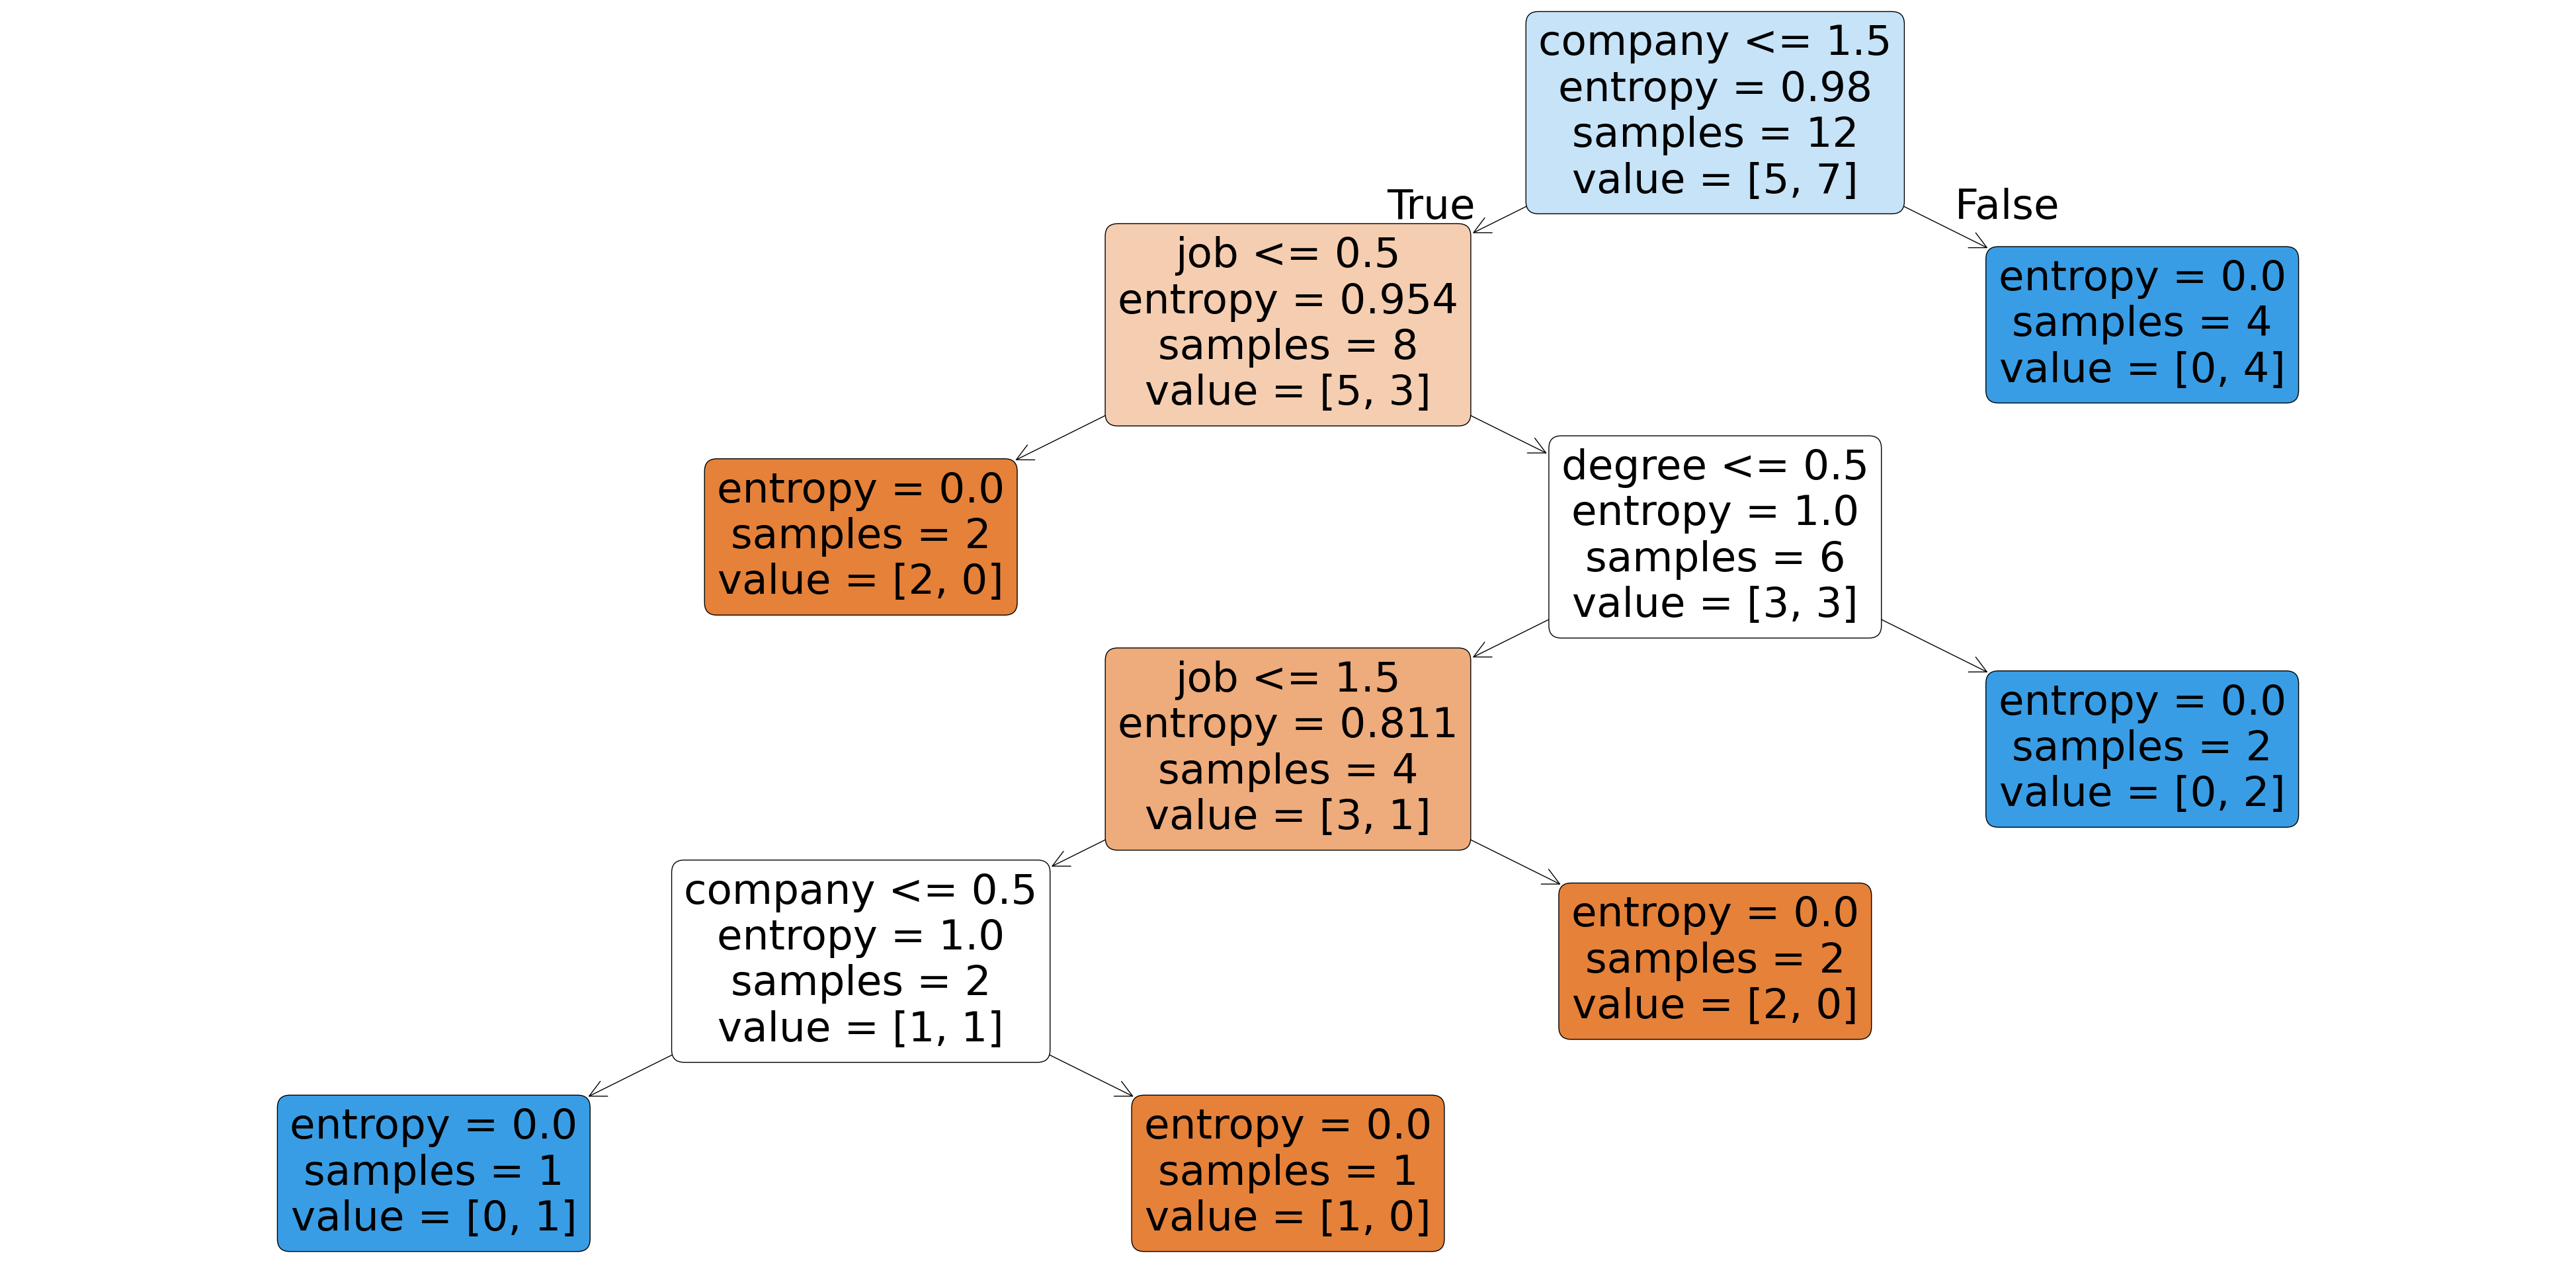

In [12]:
plt.figure(figsize=(50,25))
plot_tree(model,filled=True,rounded=True,feature_names=X.columns)
plt.show()

In [13]:
# 1. Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"1. Accuracy: {acc:.4f}\n")

# 2. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("2. Confusion Matrix:")
print(cm, "\n")

# 3. Classification Report
report = classification_report(y_test, y_pred)
print("3. Classification Report:")
print(report)

1. Accuracy: 1.0000

2. Confusion Matrix:
[[1 0]
 [0 3]] 

3. Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         3

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



In [15]:
import pickle
pickle.dump(model,open('company.pkl','wb'))